In [1]:
%matplotlib inline
from sklearn import datasets
import numpy as np
import pandas as pd
import seaborn as sns
import io
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [2]:
# 讀取資料集
iris = datasets.load_iris()
df_data = pd.read_csv('iris.csv')

In [25]:
#  查看檔案
df_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
# 刪除 標籤ID 因為不參與 運算
df_data = df_data.drop(labels=['Id'], axis=1)

In [4]:
# 調整 Species 的值 改成 012 ，讓決策樹可以計算
label_map = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

#將編碼後的label map存至df_data['Species']中。
df_data['Class'] = df_data['Species'].map(label_map)

In [5]:
# 檢查缺失值
print("checked missing data(NAN mount):",len(np.where(np.isnan(9))[0]))
# 移除缺失值 train=train.dropna()

checked missing data(NAN mount): 0


3) 設定 X=資料  y=標籤

In [6]:
X = df_data.drop(labels=['Class','Species'],axis=1).values
y = df_data['Class'].values

4) 切割訓練集 與 測試集

In [7]:
# 
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=.3 , random_state=42)

In [8]:
print('Training data shape:',X_train.shape)
print('Testing data shape:',X_test.shape)

Training data shape: (105, 4)
Testing data shape: (45, 4)


# 評估模型

In [9]:
#create model
decisionTreeModel = DecisionTreeClassifier(criterion = 'gini', max_depth=3 ,random_state=42)
decisionTreeModel.fit(X_train, y_train)

print('訓練集: ',decisionTreeModel.score(X_train, y_train))
print('測試集: ',decisionTreeModel.score(X_test, y_test))

訓練集:  0.9523809523809523
測試集:  1.0


In [10]:
# 特徵重要程度
print('特徵重要程度: ',decisionTreeModel.feature_importances_)

特徵重要程度:  [0.         0.         0.92510833 0.07489167]


# 視覺化決策樹
- 內建視覺化：  from sklearn import tree
- Graphviz 是視覺化決策樹的套件，可參考Graphviz官網的介紹。以下範例一樣用 iris 資料集，並採用四個特徵下去做訓練。

pip install graphviz
pip install pydot

吃不到值，改從：conda 安裝
- 輸入：conda install python-graphviz

[Text(125.55000000000001, 190.26, 'X[2] <= 2.45\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(83.7, 135.9, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(167.4, 135.9, 'X[2] <= 4.75\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(83.7, 81.53999999999999, 'X[3] <= 1.6\ngini = 0.059\nsamples = 33\nvalue = [0, 32, 1]'),
 Text(41.85, 27.180000000000007, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(125.55000000000001, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(251.10000000000002, 81.53999999999999, 'X[3] <= 1.75\ngini = 0.214\nsamples = 41\nvalue = [0, 5, 36]'),
 Text(209.25, 27.180000000000007, 'gini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(292.95, 27.180000000000007, 'gini = 0.059\nsamples = 33\nvalue = [0, 1, 32]')]

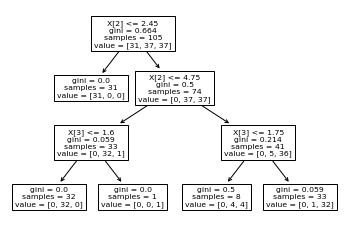

In [36]:
from sklearn import tree
tree.plot_tree(decisionTreeModel)

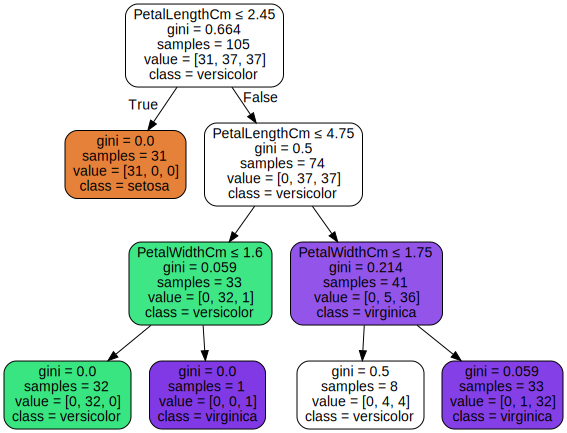

In [11]:
import graphviz
from sklearn.tree import export_graphviz
dot_data = export_graphviz(decisionTreeModel, out_file=None, 
                         feature_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
                         class_names=['setosa', 'versicolor', 'virginica'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data) 
graph

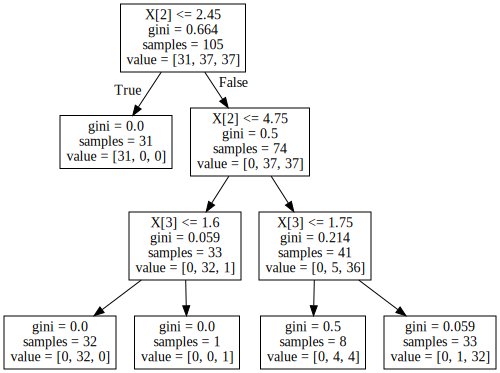

In [12]:
import graphviz
from sklearn.tree import export_graphviz
dot_data = export_graphviz(decisionTreeModel)  
graph = graphviz.Source(dot_data) 
graph

# 視覺化 操作 (略)(需要先降維)

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx = None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1

    xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                            np.arange(x2_min,x2_max,resolution))

    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)

    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0], y=X[y==cl,1],
            alpha=0.8, c=[cmap(idx)], marker=markers[idx],label=cl)
    if test_idx:
        X_test, y_test = X[test_idx,:], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:,1], c='',
            alpha=1.0, linewidth=1, marker='o',
            s=55, label='test set')

In [ ]:
# PCA降維用 - 方便視覺化
from sklearn.decomposition import PCA

pca = PCA(n_components=2, iterated_power=1)
train_reduced = pca.fit_transform(X_train)
test_reduced = pca.transform(X_test)

In [ ]:
# PCA降維用
# 建立Logistic模型
decisionTreeModel = DecisionTreeClassifier(criterion = 'entropy', max_depth=6, random_state=42)
# 使用訓練資料訓練模型
decisionTreeModel.fit(train_reduced, y_train)
# 使用訓練資料預測分類
predicted = decisionTreeModel.predict(train_reduced)

In [ ]:
# 訓練集預測
# 決策邊界 Function1 : 
plot_decision_regions(train_reduced, y_train, decisionTreeModel)
# print('train set accurancy: ',decisionTreeModel.score(train_reduced, y_train))


In [ ]:
# 測試集預測
# 決策邊界 Function2 :
plot_decision_regions(test_reduced, y_test, decisionTreeModel)
# print('test set accurancy: ',decisionTreeModel.score(test_reduced, y_test))